In [1]:
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from numba import njit, jit

In [3]:
def soft_threshold(rho, lamda, w):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda * w:
        return rho + lamda * w
    elif rho >  lamda * w:
        return rho - lamda * w
    else: 
        return 0.0

In [3]:
def adaptive_lasso(theta, X , y, penalty_factors, lamda = 0.001, num_iters = 1000, intercept = False):
    '''Coordinate gradient descent for lasso regression - for standardized data ''' 
    
    scaler = StandardScaler()
    y = scaler.fit_transform(y)
    
    if intercept == False:
        X = scaler.fit_transform(X)
    else:
        # we drop the constant from the regression, since all variables, including the dependent variable, are standardized
        X = np.delete(X, 0, 1)
        X = scaler.fit_transform(X)
    
    m, p = X.shape
    
    for i in range(num_iters): 
        for j in range(p):
            w_j = penalty_factors[j]
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
            z = np.sum(np.square(X_j))
        
            #if intercept == True:  
            #    if j == 0: 
            #        theta[j] =  rho / z
            #    else:
            #        theta[j] =  (1 / z) * soft_threshold(rho, lamda, w_j)  

            theta[j] =  (1 / z) * soft_threshold(rho, lamda, w_j)   
            
    return theta.flatten()

In [246]:
np.random.seed(seed=1)
X = np.random.rand(50,3)
m, p = X.shape
#X = np.insert(X, 0, 1, axis=1)
y = np.array(1.5 * X[:,0] - 14.5 * X[:,1] + 5, dtype=np.float64).reshape(-1,1)
initial_theta = np.ones((p,1))
pen = np.ones((p,1))

In [77]:
data = np.insert(X, 0, np.array(1.5 * X[:,0] - 14.5 * X[:,1]), axis=1)

In [78]:
np.savetxt("test_lasso.csv", data , delimiter=',', header="y,X_0,X_1", comments="")

In [182]:
type(X[0,0])

numpy.float64

In [37]:
3.9 * 0.4365 - 9.5 * 0.8817 + 20

13.3262

In [220]:
betas = adaptive_lasso(theta=initial_theta, X=X, y=y, penalty_factors = pen, intercept = True)

In [221]:
betas

array([ 0.72464173, -0.72317067])

In [222]:
X = np.delete(X, 0, 1)
(betas / np.std(X)) * np.std(y)

array([ 2.99131208, -2.98523955])

In [145]:
betas[0] - ( np.sum(  (X[:,1:].mean(axis=0) / np.std(X[:,1:], axis=0)) * betas[1:] ))

6.000000047248456

In [72]:
X = np.random.rand(1000,2)
X = np.insert(X, 0, 1, axis=1)
y = np.array(3 * X[:,1] - 3 * X[:,2] + 20* X[:,0]).reshape(-1,1)
m, p = X.shape
initial_theta = np.ones((p,1))
pen = np.ones((p,1))

In [238]:
betas_2 = adaptive_lasso_intercept(theta=initial_theta, X=X, y=y, penalty_factors = pen, intercept = True)

In [239]:
betas_2

array([20.020455  ,  0.88032817, -0.877247  ])

In [243]:
(betas_2 / np.std(X)) * np.std(y)
(betas_2) * np.std(y)

array([24.36443892,  1.07133939, -1.06758968])

In [37]:
def adaptive_lasso_intercept(theta, X , y, penalty_factors, lamda = 0.001, num_iters = 1000, intercept = True):
    '''Coordinate gradient descent for lasso regression - for standardized data ''' 

    scaler = StandardScaler()
    y = scaler.fit_transform(y)
    
    if intercept == False:
        X = scaler.fit_transform(X)
    else:
        # add intercept column
        X = scaler.fit_transform(X)
        X = np.insert(X, 0, 1, axis=1)
    
    m, p = X.shape
    
    for i in range(num_iters): 
        for j in range(p):
            w_j = penalty_factors[j]
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
            z = np.sum(np.square(X_j))
        
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho / z
                else:
                    theta[j] =  (1 / z) * soft_threshold(rho, lamda, w_j) 
                    
            else:
                theta[j] =  (1 / z) * soft_threshold(rho, lamda, w_j)   
            
    return theta.flatten()

In [115]:
m, p = X.shape
intercept = True
if intercept:
    p = p + 1

initial_theta = np.ones((p,1))
pen = np.ones((p,1))

betas = adaptive_lasso_intercept(theta=initial_theta, X = X , y = y, penalty_factors = pen, intercept = intercept)

In [116]:
betas

array([ 1.75823023e-14,  1.02579599e-01, -9.94392115e-01])

In [117]:
betas / np.std(X) * np.std(y)

array([ 2.56740532e-13,  1.49788920e+00, -1.45203260e+01])

In [87]:
betas / np.std(X) * np.std(y)

array([ 2.56740532e-13,  1.49788920e+00, -1.45203260e+01])

In [118]:
(betas[0] - (np.sum(  (X[:,1:].mean(axis=0) / np.std(X[:,1:], axis=0)) * betas[1:]))) * np.std(y) + np.mean(y)

5.0005240897670795

In [110]:
reg = Lasso(alpha=0.001, fit_intercept = False)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
y_std = scaler.fit_transform(y)
y_std = y_std.flatten()
# Fit the lasso regression
reg.fit(X_std, y_std)

Lasso(alpha=0.001)

In [111]:
print(reg.coef_)

[ 0.10158284 -0.99339536]


In [109]:
print(reg.intercept_)

0.0


In [119]:
X[:,:].mean(axis=0)

array([0.49912737, 0.50018097])

In [121]:
np.std(X)

0.28887777651043417

In [126]:
a = np.array([1,2])
x_mean = X[:,:].mean(axis=0)
x_std = X[:,:].std(axis=0)
y_std = np.std(y)

a / x_std * y_std

array([14.62278928, 29.16354553])

In [124]:
x_std = X[:,:].std(axis=0)

In [125]:
x_std

array([0.2884713 , 0.28928273])

In [128]:
x_mean[1:]

array([0.50018097])

In [130]:
np.concatenate((x_mean[1:], x_mean))

array([0.50018097, 0.49912737, 0.50018097])

In [38]:
def adaptive_lasso_intercept(theta, X , y, penalty_factors, lamda = 0.001, num_iters = 1000, intercept = True):
    '''Coordinate gradient descent for lasso regression - for standardized data ''' 

    x_mean = X[:,:].mean(axis=0)
    x_std = X[:,:].std(axis=0)
    y_mean = np.mean(y)
    y_std = np.std(y)

    scaler = StandardScaler()
    y = scaler.fit_transform(y)
    
    if intercept == False:
        X = scaler.fit_transform(X)
    else:
        # add intercept column
        X = scaler.fit_transform(X)
        X = np.insert(X, 0, 1, axis=1)
    
    m, p = X.shape
    
    for i in range(num_iters): 
        for j in range(p):
            w_j = penalty_factors[j]
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
            z = np.sum(np.square(X_j))
        
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho / z
                else:
                    theta[j] =  (1 / z) * soft_threshold(rho, lamda, w_j) 
                    
            else:
                theta[j] =  (1 / z) * soft_threshold(rho, lamda, w_j)   

    if intercept == False:
        theta_nat = theta.flatten() / x_std * y_std
    if intercept == True:
        theta_0 = (theta.flatten()[0] - np.sum((x_mean[1:] / x_std[1:]) * theta.flatten()[1:])) * y_std + y_mean
        theta_betas = theta.flatten()[1:] / x_std[1:] * y_std
        theta_nat = np.insert(arr = theta_betas, obj = 0, values= theta_0)
        
    return [theta.flatten(), theta_nat]

In [137]:
m, p = X.shape
intercept = True
if intercept:
    p = p + 1

initial_theta = np.ones((p,1))
pen = np.ones((p,1))

betas, betas_nat = adaptive_lasso_intercept(theta=initial_theta, X = X , y = y, penalty_factors = pen, intercept = intercept)

In [138]:
betas

array([ 1.75823023e-14,  1.02579599e-01, -9.94392115e-01])

In [39]:
def update_coeffs(X, y, theta, active_set, penalty_factors, intercept, lamda, thresh, active_thresh):
    active_set_converged_check = np.full((len(active_set), ), False)
    active_set_update = np.full((len(active_set), ), True)
    
    #if determine_null_dev:
    #    null_dev = np.ones((len(active_set), ))
    
    for subindex, j in enumerate(active_set):
        w_j = penalty_factors[j]
        X_j = X[:,j].reshape(-1,1)

        y_pred = X @ theta
        rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
        z = np.sum(np.square(X_j))

        if intercept == True:  
            if j == 0:
                tmp = rho / z
                #if determine_null_dev:
                #    null_dev[j] = np.abs(theta[j] - tmp)
                if np.abs(tmp) < active_thresh:
                    active_set_update[subindex] = False
                if np.abs(theta[j] - tmp) < thresh:
                    active_set_converged_check[subindex] = True
                theta[j] =  tmp
            else:
                tmp = (1 / z) * soft_threshold(rho, lamda, w_j)
                #if determine_null_dev:
                #    null_dev[j] = np.abs(theta[j] - tmp)
                if np.abs(tmp) < active_thresh:
                    active_set_update[subindex] = False
                if np.abs(theta[j] - tmp) < thresh:
                    active_set_converged_check[subindex] = True
                theta[j] =  tmp

        else:
            tmp = (1 / z) * soft_threshold(rho, lamda, w_j)
            #if determine_null_dev:
            #    null_dev[j] = np.abs(theta[j] - tmp)
            if np.abs(tmp) < active_thresh:
                active_set_update[subindex] = False
            if np.abs(theta[j] - tmp) < thresh:
                active_set_converged_check[subindex] = True
            theta[j] =  tmp
    
    active_set_converged = np.all(active_set_converged_check)
    active_set = active_set[active_set_update]
    
    #if determine_null_dev:
    #    return  [theta, active_set, active_set_converged, null_dev]
    #else:
    return  [theta, active_set, active_set_converged]

In [87]:
def get_lamda_path(X, y, epsilon = 0.0001, K = 100):
    # Calculate lambda path
    # get lambda_max
    m, p = X.shape

    y = y.reshape((m,1))
    sx = X
    sy = y

    lambda_max = np.max(np.abs(np.sum(sx*sy, axis=0))) / m
    lamda_path = np.exp(np.linspace(start= np.log(lambda_max), stop=np.log(lambda_max*epsilon),num= np.int64(K)))

    return lamda_path

In [7]:
def adaptive_lasso_intercept(X , y, penalty_factors = None, theta = None, lamda_path = "auto", num_iters = 100, intercept = True, thresh = 1e-7, warm_start = True):
    '''Coordinate gradient descent for lasso regression - for standardized data ''' 
    
    #x_mean = X[:,:].mean(axis=0)
    #x_std = X[:,:].std(axis=0)
    
    #m, p = X.shape
    #x_mean = np.zeros((p,),dtype=np.float64)
    #for i in range(p):
    #    x_mean[i] = X[:,i].mean()
        
    #x_std = np.zeros((p,),dtype=np.float64)
    #for i in range(p):
    #    x_std[i] = X[:,i].std()
    
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    
    y_mean = np.mean(y)
    y_std = np.std(y)

    scaler = StandardScaler()
    y = scaler.fit_transform(y)
    X = scaler.fit_transform(X)
    #X_std = (X - x_mean) / x_std
    #y = (y - y_mean) / y_std
    
    if lamda_path == "auto":
        path = get_lamda_path(X = X, y = y, epsilon = 0.0001, K = 100)
    else:
        path = [0.001]
        
    if intercept == True:
        X = np.insert(X, 0, 1, axis=1)
        #X = np.ones((m, p + 1))
        #X[:,1:] = X_std
    
    m, p = X.shape

    if theta is None:
        theta = np.zeros((p,1))

    if penalty_factors is None:
        penalty_factors = np.ones((p,1))

    result = []
    for lamda in path:
        output = {}
        output['lamda'] = lamda
        tol_vals = np.full((p, ), False)
        
        #print("next lamda")
        for i in range(num_iters):
            #print(f"Theta before loop {i} : {theta}")
            if not np.all(tol_vals):
                for j in range(p):
                    #print("start_theta:")
                    #print(theta)
                    w_j = penalty_factors[j]
                    X_j = X[:,j].reshape(-1,1)

                    y_pred = X @ theta
                    rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
                    z = np.sum(np.square(X_j))

                    if intercept == True:  
                        if j == 0:
                            if np.abs(theta[j] - rho / z ) < thresh:
                                tol_vals[j] = True
                            theta[j] =  rho / z
                        else:
                            if np.abs(theta[j] - (1 / z) * soft_threshold(rho, lamda, w_j)) < thresh:
                                tol_vals[j] = True
                            theta[j] =  (1 / z) * soft_threshold(rho, lamda, w_j) 

                    else:
                        if np.abs(theta[j] - (1 / z) * soft_threshold(rho, lamda, w_j)) < thresh:
                                tol_vals[j] = True
                        theta[j] =  (1 / z) * soft_threshold(rho, lamda, w_j)
            else:
                break
            #print(f"Theta after loop {i} : {theta}")
                
            
        if intercept == False:
            theta_nat = theta.flatten() / x_std * y_std
        if intercept == True:
            theta_0 = (theta.flatten()[0] - np.sum((x_mean / x_std) * theta.flatten()[1:])) * y_std + y_mean
            theta_betas = theta.flatten()[1:] / x_std * y_std
            theta_nat = np.insert(arr = theta_betas, obj = 0, values= theta_0)

        output['theta_std'] = theta.flatten()
        output['theta_nat'] = theta_nat
        result.append(output)
    
    return result

In [88]:
def sk_lasso():
    path = get_lamda_path(X = X, y = y, epsilon = 0.0001, K = 100)
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)
    y_std = scaler.fit_transform(y)
    y_std = y_std.flatten()

    for i in path:
        reg = Lasso(alpha= i, fit_intercept = True)
        reg.fit(X_std, y_std)

In [40]:
def adaptive_lasso(X , y, penalty_factors = None, theta = None, lamda_path = "auto", num_iters = 100, intercept = True, thresh = 1e-7, active_thresh = 1e-7):
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    
    y_mean = np.mean(y)
    y_std = np.std(y)

    X = (X - x_mean) / x_std
    y = (y - y_mean) / y_std

    if lamda_path == "auto":
        path = get_lamda_path(X = X, y = y, epsilon = 0.0001, K = 100)
    else:
        path = lamda_path
    
    if intercept == True:
        X = np.insert(X, 0, 1, axis=1)

    m, p = X.shape

    if theta is None:
        theta = np.zeros((p,1))

    if penalty_factors is None:
        penalty_factors = np.ones((p,1))

    result = []
    for lamda in path:
        output = {}
        output['lamda'] = lamda
        sec_check_all_converged = False
        active_set = np.arange(p)
        active_set_converged = False
        
        for i in range(num_iters): 
            #print(str(i))
             #if i == 0:
             #   theta, active_set, active_set_converged, null_dev = update_coeffs(X = X, 
             #                                                           y = y,
             #                                                           theta = theta, 
             #                                                           active_set = active_set, 
             #                                                           penalty_factors = penalty_factors, 
             #                                                           intercept = intercept, 
             #                                                           lamda = lamda, 
             #                                                           thresh = thresh, 
             #                                                           active_thresh = active_thresh,
             #                                                           determine_null_dev = True)
                #thresh_inner = thresh_inner * null_dev
                #print("Done")
            if (active_set.size != 0) and (not active_set_converged):
                theta, active_set, active_set_converged = update_coeffs(X = X, 
                                                                        y = y,
                                                                        theta = theta, 
                                                                        active_set = active_set, 
                                                                        penalty_factors = penalty_factors, 
                                                                        intercept = intercept, 
                                                                        lamda = lamda, 
                                                                        thresh = thresh, 
                                                                        active_thresh = active_thresh)
            elif not sec_check_all_converged:
                active_set = np.arange(p)
                theta, active_set, active_set_converged = update_coeffs(X = X,
                                                                        y = y,
                                                                        theta = theta, 
                                                                        active_set = active_set, 
                                                                        penalty_factors = penalty_factors, 
                                                                        intercept = intercept, 
                                                                        lamda = lamda, 
                                                                        thresh = thresh, 
                                                                        active_thresh = active_thresh)
                #print(f"Theta before loop {i} : {theta}")
                #print(active_set)
                #print("Active_set_converged:")
                #print(active_set_converged)
                
                if active_set_converged:
                    #print("Sec. check successful!")
                    sec_check_all_converged = True
                    #print(f"Final theta : {theta}")
                    break
            else:
                break


        if intercept == False:
            theta_nat = theta.flatten() / x_std * y_std
        if intercept == True:
            theta_0 = (theta.flatten()[0] - np.sum((x_mean / x_std) * theta.flatten()[1:])) * y_std + y_mean
            theta_betas = theta.flatten()[1:] / x_std * y_std
            theta_nat = np.insert(arr = theta_betas, obj = 0, values= theta_0)

        output['theta_std'] = theta.flatten()
        output['theta_nat'] = theta_nat
        result.append(output)

    return result

In [37]:
np.random.seed(seed=1)
X = np.random.rand(4000,300)
y = np.array(1.5 * X[:,0] - 14.5 * X[:,1] + 5, dtype=np.float64).reshape(-1,1)

In [81]:
%%time
res_old = adaptive_lasso_intercept(X = X , y =y)

KeyboardInterrupt: 

In [74]:
%%time
res = adaptive_lasso(X = X, y = y, lamda_path = "auto", thresh = 1e-7, active_thresh = 1e-7)

CPU times: user 4.6 s, sys: 243 ms, total: 4.84 s
Wall time: 1.57 s


In [38]:
%%time
sk_lasso()

CPU times: user 7.64 s, sys: 370 ms, total: 8.01 s
Wall time: 2.23 s


In [44]:
%%time
res = adaptive_lasso_numba(X = X, y = y, lamda_path = "auto")

CPU times: user 2min 41s, sys: 1.86 s, total: 2min 43s
Wall time: 42.6 s


In [43]:
%%time
res = adaptive_lasso_numba_intercept(X = X, y = y, lamda_path = "auto")

CPU times: user 2min 20s, sys: 1.53 s, total: 2min 21s
Wall time: 36.8 s


In [29]:
import matplotlib.pyplot as plt 

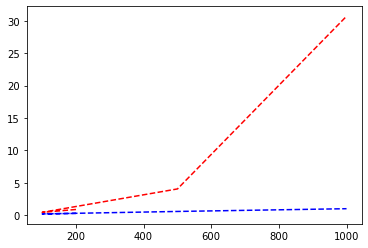

In [31]:
# evenly sampled time at 200ms intervals
t = [200,100,500, 1000]

# red dashes, blue squares and green triangles
plt.plot(t, [0.890,0.447, 4.06, 30.7] , 'r--', t, [0.286,0.206, 0.586, 1.01], 'b--')
plt.show()

In [31]:
@njit
def soft_threshold_numba(rho, lamda, w):
    if rho < - lamda * w:
        return rho + lamda * w
    elif rho >  lamda * w:
        return rho - lamda * w
    else: 
        return 0.0

In [41]:
@njit
def adaptive_lasso_numba_intercept(X , y, penalty_factors = None, theta = None, lamda_path = None, num_iters = 100, intercept = True, thresh = 1e-7):
    '''Coordinate gradient descent for lasso regression - for standardized data ''' 
    
    m, p = X.shape
    x_mean = np.zeros((p,),dtype=np.float64)
    for i in range(p):
        x_mean[i] = X[:,i].mean()
        
    x_std = np.zeros((p,),dtype=np.float64)
    for i in range(p):
        x_std[i] = X[:,i].std()
    
    
    y_mean = np.mean(y)
    y_std = np.std(y)

    X = (X - x_mean) / x_std
    y = (y - y_mean) / y_std
    
    #if lamda_path == "auto":
    #    path = [0.001]
    path = [2.857874270239155,
 2.603988596702651,
 2.3726574266648925,
 2.1618770801978675,
 1.9698218787759958,
 1.7948283321221274,
 1.6353807298505643,
 1.4900980131088004,
 1.357721812506429,
 1.2371055487214755,
 1.1272045013788243,
 1.0270667601821153,
 0.9358249799221423,
 0.8526888679475817,
 0.7769383390281148,
 0.7079172783206475,
 0.6450278584164171,
 0.5877253612459741,
 0.5355134599918534,
 0.4879399201431188,
 0.44459268245637595,
 0.40509629389573,
 0.3691086556382036,
 0.33631805997738856,
 0.3064404904604118,
 0.27921716187329104,
 0.2544122787672127,
 0.23181099311115563,
 0.21121754338102922,
 0.19245355896700148,
 0.17535651521260795,
 0.15977832570392755,
 0.14558405961590895,
 0.13265077300611328,
 0.1208664439331003,
 0.11012900217596196,
 0.1003454451508982,
 0.09143103236732805,
 0.08330855144629912,
 0.07590764934379896,
 0.06916422298634396,
 0.06301986404082344,
 0.05742135300946009,
 0.05232019826798009,
 0.0476722160543616,
 0.043437147770225164,
 0.03957831128011415,
 0.03606228318838558,
 0.03285860934174666,
 0.02993954104994806,
 0.027279794739903485,
 0.024856332961475294,
 0.022648164848102118,
 0.020636164303954655,
 0.018802904342843405,
 0.017132506144001115,
 0.0156105015173336,
 0.014223707586878702,
 0.012960112607041186,
 0.011808771922598759,
 0.010759713171334284,
 0.009803849908205072,
 0.008932902902902731,
 0.008139328429120903,
 0.007416252924406953,
 0.006757413454652204,
 0.006157103467552789,
 0.0056101233651836314,
 0.0051117354675686184,
 0.0046576229771631275,
 0.004243852588818783,
 0.0038668404213759743,
 0.003523320975799717,
 0.0032103188509891834,
 0.0029251229722768134,
 0.002665263109396476,
 0.002428488480530631,
 0.0022127482571150047,
 0.0020161738005426556,
 0.0018370624769102856,
 0.0016738629096179224,
 0.0015251615420869573,
 0.0013896703942093034,
 0.0012662159064798467,
 0.001153728775185449,
 0.0010512346906077228,
 0.0009578458980183457,
 0.0008727535083723128,
 0.0007952204920979788,
 0.0007245752952995095,
 0.0006602060230782952,
 0.0006015551395920666,
 0.000548114638946145,
 0.0004994216450894154,
 0.000455054402603404,
 0.0004146286236586048,
 0.0003777941594971461,
 0.0003442319676117548,
 0.00031365134835218414,
 0.0002857874270239154]
        
    if intercept == True:
        X_tmp = np.ones((m, p + 1))
        X_tmp[:,1:] = X
        X = X_tmp
    
    m, p = X.shape

    if theta is None:
        theta = np.zeros((p,1))

    if penalty_factors is None:
        penalty_factors = np.ones((p,1))

    lamdas = []
    thetas = []
    thetas_nat = []
    for lamda in path:
        tol_vals = np.full((p, ), False)
        
        for i in range(num_iters):
            #print(f"Theta before loop {i} : {theta}")
            if not np.all(tol_vals):
                for j in range(p):
                    #print("start_theta:")
                    #print(theta)
                    w_j = penalty_factors[j].item()
                    #X_j = X[:,[j]]

                    y_pred = X @ theta
                    rho = 0.0
                    z = 0.0
                    for obs in range(m):
                        rho += X[obs,j].item() * (y[obs].item() - y_pred[obs].item() + theta[j].item() * X[obs,j].item())
                        z += np.square(X[obs,j].item())

                    if intercept == True:  
                        if j == 0:
                            if np.abs(theta[j] - rho / z ) < thresh:
                                tol_vals[j] = True
                            theta[j] =  rho / z
                        else:
                            if np.abs(theta[j] - (1 / z) * soft_threshold_numba(rho, lamda, w_j)) < thresh:
                                tol_vals[j] = True
                            theta[j] =  (1 / z) * soft_threshold_numba(rho, lamda, w_j) 

                    else:
                        if np.abs(theta[j] - (1 / z) * soft_threshold_numba(rho, lamda, w_j)) < thresh:
                                tol_vals[j] = True
                        theta[j] =  (1 / z) * soft_threshold_numba(rho, lamda, w_j)
            else:
                break
            #print(f"Theta after loop {i} : {theta}")
                
            
        if intercept == False:
            theta_tmp = theta.flatten() / x_std * y_std
        if intercept == True:
            theta_0 = (theta.flatten()[0] - np.sum((x_mean / x_std) * theta.flatten()[1:])) * y_std + y_mean
            theta_betas = theta.flatten()[1:] / x_std * y_std
            theta_tmp = np.ones((p,))
            theta_tmp[1:] = theta_betas
            theta_tmp[0] = theta_0

        #output[1] = theta
        #output[2] = theta_nat
        lamdas.append(lamda)
        thetas.append(theta)
        thetas_nat.append(theta_tmp)
  
    
    return lamdas,thetas,thetas_nat

In [9]:
@njit
def update_coeffs_numba(X, y, theta, active_set, penalty_factors, intercept, lamda, thresh, active_thresh):
    active_set_converged_check = np.full((len(active_set), ), False)
    active_set_update = np.full((len(active_set), ), True)
    
    m, p = X.shape
    
    rho = []
    z = []
    for j in range(p):
        rho_j = 0.0
        z_j = 0.0
        for obs in range(m):
                rho_j += X[obs,j].item() * (y[obs].item() - y_pred[obs].item() + theta[j].item() * X[obs,j].item())
                z_j += np.square(X[obs,j].item())
                
        rho.append(rho_j)
        z.append(z_j)
                
            
    for subindex, j in enumerate(active_set):
        w_j = penalty_factors[j].item()
        
        y_pred = X @ theta
        #rho = 0.0
        #z = 0.0
        
        #for obs in range(m):
        #    rho += X[obs,j].item() * (y[obs].item() - y_pred[obs].item() + theta[j].item() * X[obs,j].item())
        #    z += np.square(X[obs,j].item())

        if intercept == True:  
            if j == 0:
                tmp = rho / z
                if np.abs(tmp) < active_thresh:
                    active_set_update[subindex] = False
                if np.abs(theta[j] - tmp) < thresh:
                    active_set_converged_check[subindex] = True
                theta[j] =  tmp
            else:
                tmp = (1 / z) * soft_threshold_numba(rho, lamda, w_j)
                if np.abs(tmp) < active_thresh:
                    active_set_update[subindex] = False
                if np.abs(theta[j] - tmp) < thresh:
                    active_set_converged_check[subindex] = True
                theta[j] =  tmp

        else:
            tmp = (1 / z) * soft_threshold_numba(rho, lamda, w_j)
            if np.abs(tmp) < active_thresh:
                active_set_update[subindex] = False
            if np.abs(theta[j] - tmp) < thresh:
                active_set_converged_check[subindex] = True
            theta[j] =  tmp
    
    active_set_converged = np.all(active_set_converged_check)
    active_set = active_set[active_set_update]
    
    return  [theta, active_set, active_set_converged]

In [32]:
@njit
def adaptive_lasso_numba(X , y, penalty_factors = None, theta = None, lamda_path = "auto", num_iters = 100, intercept = True, thresh = 1e-2, active_thresh = 1e-2):
    
    m, p = X.shape
    
    x_mean = np.zeros((p,),dtype=np.float64)
    
    for i in range(p):
        x_mean[i] = X[:,i].mean()
        
    x_std = np.zeros((p,),dtype=np.float64)
    
    for i in range(p):
        x_std[i] = X[:,i].std()
    
    
    y_mean = np.mean(y)
    y_std = np.std(y)

    X = (X - x_mean) / x_std
    y = (y - y_mean) / y_std
    

    path = [2.857874270239155,
             2.603988596702651,
             2.3726574266648925,
             2.1618770801978675,
             1.9698218787759958,
             1.7948283321221274,
             1.6353807298505643,
             1.4900980131088004,
             1.357721812506429,
             1.2371055487214755,
             1.1272045013788243,
             1.0270667601821153,
             0.9358249799221423,
             0.8526888679475817,
             0.7769383390281148,
             0.7079172783206475,
             0.6450278584164171,
             0.5877253612459741,
             0.5355134599918534,
             0.4879399201431188,
             0.44459268245637595,
             0.40509629389573,
             0.3691086556382036,
             0.33631805997738856,
             0.3064404904604118,
             0.27921716187329104,
             0.2544122787672127,
             0.23181099311115563,
             0.21121754338102922,
             0.19245355896700148,
             0.17535651521260795,
             0.15977832570392755,
             0.14558405961590895,
             0.13265077300611328,
             0.1208664439331003,
             0.11012900217596196,
             0.1003454451508982,
             0.09143103236732805,
             0.08330855144629912,
             0.07590764934379896,
             0.06916422298634396,
             0.06301986404082344,
             0.05742135300946009,
             0.05232019826798009,
             0.0476722160543616,
             0.043437147770225164,
             0.03957831128011415,
             0.03606228318838558,
             0.03285860934174666,
             0.02993954104994806,
             0.027279794739903485,
             0.024856332961475294,
             0.022648164848102118,
             0.020636164303954655,
             0.018802904342843405,
             0.017132506144001115,
             0.0156105015173336,
             0.014223707586878702,
             0.012960112607041186,
             0.011808771922598759,
             0.010759713171334284,
             0.009803849908205072,
             0.008932902902902731,
             0.008139328429120903,
             0.007416252924406953,
             0.006757413454652204,
             0.006157103467552789,
             0.0056101233651836314,
             0.0051117354675686184,
             0.0046576229771631275,
             0.004243852588818783,
             0.0038668404213759743,
             0.003523320975799717,
             0.0032103188509891834,
             0.0029251229722768134,
             0.002665263109396476,
             0.002428488480530631,
             0.0022127482571150047,
             0.0020161738005426556,
             0.0018370624769102856,
             0.0016738629096179224,
             0.0015251615420869573,
             0.0013896703942093034,
             0.0012662159064798467,
             0.001153728775185449,
             0.0010512346906077228,
             0.0009578458980183457,
             0.0008727535083723128,
             0.0007952204920979788,
             0.0007245752952995095,
             0.0006602060230782952,
             0.0006015551395920666,
             0.000548114638946145,
             0.0004994216450894154,
             0.000455054402603404,
             0.0004146286236586048,
             0.0003777941594971461,
             0.0003442319676117548,
             0.00031365134835218414,
             0.0002857874270239154]
    
    if intercept == True:
        X_tmp = np.ones((m, p + 1))
        X_tmp[:,1:] = X
        X = X_tmp
    
    m, p = X.shape

    if theta is None:
        theta = np.zeros((p,1))

    if penalty_factors is None:
        penalty_factors = np.ones((p,1))

    lamdas = []
    thetas = []
    thetas_nat = []
    
    for lamda in path:
        sec_check_all_converged = False
        active_set = np.arange(p)
        active_set_converged = False
        
        for i in range(num_iters): 
            if (active_set.size != 0) and (not active_set_converged):
                active_set_converged_check = np.full((len(active_set), ), False)
                active_set_update = np.full((len(active_set), ), True)

                for subindex, j in enumerate(active_set):
                    w_j = penalty_factors[j].item()

                    y_pred = X @ theta
                    
                    rho = 0.0
                    z = 0.0

                    for obs in range(m):
                        rho += X[obs,j].item() * (y[obs].item() - y_pred[obs].item() + theta[j].item() * X[obs,j].item())
                        z += np.square(X[obs,j].item())
                
                    ###
                    if intercept == True:  
                        if j == 0:
                            tmp = rho / z
                            if np.abs(tmp) < active_thresh:
                                active_set_update[subindex] = False
                            if np.abs(theta[j] - tmp) < thresh:
                                active_set_converged_check[subindex] = True
                            theta[j] =  tmp
                        else:
                            tmp = (1 / z) * soft_threshold_numba(rho, lamda, w_j)
                            if np.abs(tmp) < active_thresh:
                                active_set_update[subindex] = False
                            if np.abs(theta[j] - tmp) < thresh:
                                active_set_converged_check[subindex] = True
                            theta[j] =  tmp

                    else:
                        tmp = (1 / z) * soft_threshold_numba(rho, lamda, w_j)
                        if np.abs(tmp) < active_thresh:
                            active_set_update[subindex] = False
                        if np.abs(theta[j] - tmp) < thresh:
                            active_set_converged_check[subindex] = True
                        theta[j] =  tmp

                active_set_converged = np.all(active_set_converged_check)
                active_set = active_set[active_set_update]
                
            elif not sec_check_all_converged:
                active_set = np.arange(p)
                
                active_set_converged_check = np.full((len(active_set), ), False)
                active_set_update = np.full((len(active_set), ), True)

                m, p = X.shape

                for subindex, j in enumerate(active_set):
                    w_j = penalty_factors[j].item()

                    y_pred = X @ theta
                    rho = 0.0
                    z = 0.0

                    for obs in range(m):
                        rho += X[obs,j].item() * (y[obs].item() - y_pred[obs].item() + theta[j].item() * X[obs,j].item())
                        z += np.square(X[obs,j].item())

                    if intercept == True:  
                        if j == 0:
                            tmp = rho / z
                            if np.abs(tmp) < active_thresh:
                                active_set_update[subindex] = False
                            if np.abs(theta[j] - tmp) < thresh:
                                active_set_converged_check[subindex] = True
                            theta[j] =  tmp
                        else:
                            tmp = (1 / z) * soft_threshold_numba(rho, lamda, w_j)
                            if np.abs(tmp) < active_thresh:
                                active_set_update[subindex] = False
                            if np.abs(theta[j] - tmp) < thresh:
                                active_set_converged_check[subindex] = True
                            theta[j] =  tmp

                    else:
                        tmp = (1 / z) * soft_threshold_numba(rho, lamda, w_j)
                        if np.abs(tmp) < active_thresh:
                            active_set_update[subindex] = False
                        if np.abs(theta[j] - tmp) < thresh:
                            active_set_converged_check[subindex] = True
                        theta[j] =  tmp

                active_set_converged = np.all(active_set_converged_check)
                active_set = active_set[active_set_update]
                
                if active_set_converged:
                    sec_check_all_converged = True
                    break
            else:
                break
            
        if intercept == False:
            theta_tmp = theta.flatten() / x_std * y_std
        if intercept == True:
            theta_0 = (theta.flatten()[0] - np.sum((x_mean / x_std) * theta.flatten()[1:])) * y_std + y_mean
            theta_betas = theta.flatten()[1:] / x_std * y_std
            theta_tmp = np.ones((p,))
            theta_tmp[1:] = theta_betas
            theta_tmp[0] = theta_0
        
        
        lamdas.append(lamda)
        thetas.append(theta)
        thetas_nat.append(theta_tmp)

    return lamdas,thetas,thetas_nat

In [170]:
def eps_thresh_adaptive_lasso(X , y, penalty_factors = None, theta = None, lamda_path = "auto", num_iters = 100, intercept = True, thresh = 1e-7):
    '''Coordinate gradient descent for lasso regression - for standardized data ''' 
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    
    y_mean = np.mean(y)
    y_std = np.std(y)

    X = (X - x_mean) / x_std
    y = (y - y_mean) / y_std
    
    if lamda_path == "auto":
        path = get_lamda_path(X = X, y = y, epsilon = 0.0001, K = 100)
    else:
        path = lamda_path
        
    if intercept == True:
        X = np.insert(X, 0, 1, axis=1)
    
    m, p = X.shape

    if theta is None:
        theta = np.zeros((p,1))

    if penalty_factors is None:
        penalty_factors = np.ones((p,1))

    result = []
    for lamda in path:
        theta = np.zeros((p,1))
        output = {}
        output['lamda'] = lamda
        tol_vals = np.full((p, ), False)
        
        for i in range(num_iters):
            if not np.all(tol_vals):
                for j in range(p):
                    w_j = penalty_factors[j].item()
                    X_j = X[:,j].reshape(-1,1)

                    y_pred = X @ theta
                    rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
                    z = np.sum(np.square(X_j))

                    if intercept == True:  
                        if j == 0:
                            if np.abs(theta[j] - rho / z ) < thresh:
                                tol_vals[j] = True
                            theta[j] =  rho / z
                        else:
                            if np.abs(theta[j] - (1 / z) * soft_threshold(rho, lamda, w_j)) < thresh:
                                tol_vals[j] = True
                            theta[j] =  (1 / z) * soft_threshold(rho, lamda, w_j) 

                    else:
                        if np.abs(theta[j] - (1 / z) * soft_threshold(rho, lamda, w_j)) < thresh:
                            tol_vals[j] = True
                        theta[j] =  (1 / z) * soft_threshold(rho, lamda, w_j)
            else:
                break

        if intercept == False:
            theta_nat = theta.flatten() / x_std * y_std
        if intercept == True:
            theta_0 = (theta.flatten()[0] - np.sum((x_mean / x_std) * theta.flatten()[1:])) * y_std + y_mean
            theta_betas = theta.flatten()[1:] / x_std * y_std
            theta_nat = np.insert(arr = theta_betas, obj = 0, values= theta_0)

        output['theta_std'] = theta.flatten()
        output['theta_nat'] = theta_nat
        result.append(output)
    
    return result

In [142]:
np.random.seed(seed=1)
X = np.random.rand(300,150)
y = np.array(1.5 * X[:,0] - 14.5 * X[:,1] + 5, dtype=np.float64).reshape(-1,1)

In [15]:
%%time
res = naive_adaptive_lasso(X = X, y = y, lamda_path = "auto")

CPU times: user 3min 29s, sys: 3.22 s, total: 3min 32s
Wall time: 54.6 s


In [20]:
%%time
res2 = eps_thresh_adaptive_lasso(X = X, y = y, lamda_path = "auto")

CPU times: user 2min 11s, sys: 2.04 s, total: 2min 13s
Wall time: 34.3 s


In [53]:
%%time
res3 = eps_thresh_adaptive_lasso_warm_start(X = X, y = y, lamda_path = "auto", warm_start = True)

CPU times: user 1min 18s, sys: 1.24 s, total: 1min 20s
Wall time: 20.9 s


In [133]:
%%time
sk_lasso()

CPU times: user 207 ms, sys: 30.2 ms, total: 237 ms
Wall time: 180 ms


In [130]:
%%time
res = lasso_numba(X = X, y = y, lamda_path = "auto")

CPU times: user 1.02 s, sys: 53.3 ms, total: 1.07 s
Wall time: 400 ms


In [93]:
%%time
res4 = adaptive_lasso(X = X, y = y, lamda_path = "auto")

CPU times: user 10.3 s, sys: 237 ms, total: 10.5 s
Wall time: 2.94 s


In [135]:
@njit
def lasso_numba(X , y, penalty_factors = None, theta = None, lamda_path = "auto", lamda_path_custom = np.array([0.01]), num_iters = 100, intercept = True, thresh = 1e-7, active_thresh = 1e-7, warm_start = True):
    
    m, p = X.shape
    
    x_mean = np.zeros((p,),dtype=np.float64)
    
    for i in range(p):
        x_mean[i] = X[:,i].mean()
        
    x_std = np.zeros((p,),dtype=np.float64)
    
    for i in range(p):
        x_std[i] = X[:,i].std()
    
    
    y_mean = np.mean(y)
    y_std = np.std(y)

    X = (X - x_mean) / x_std
    y = (y - y_mean) / y_std
    
    if lamda_path == "auto":
        path = get_lamda_path_numba(X = X, y = y)
    else:
        path = lamda_path_custom
    
    
    if intercept == True:
        X_tmp = np.ones((m, p + 1))
        X_tmp[:,1:] = X
        X = X_tmp
    
    m, p = X.shape

    if theta is None:
        theta = np.zeros((p,1))

    if penalty_factors is None:
        penalty_factors = np.ones((p,1))

    lamdas = []
    thetas = []
    thetas_nat = []

    for lamda in path:
        if not warm_start:
            theta = np.zeros((p,1))
        sec_check_all_converged = False
        active_set = np.arange(p)
        active_set_converged = False
        
        for i in range(num_iters): 
            if (active_set.size != 0) and (not active_set_converged):
                active_set_converged_check = np.full((len(active_set), ), False)
                active_set_update = np.full((len(active_set), ), True)

                for subindex, j in enumerate(active_set):
                    w_j = penalty_factors[j].item()

                    y_pred = X @ theta
                    
                    rho = 0.0
                    z = 0.0

                    for obs in range(m):
                        rho += X[obs,j].item() * (y[obs].item() - y_pred[obs].item() + theta[j].item() * X[obs,j].item())
                        z += np.square(X[obs,j].item())
                
                    ###
                    if intercept == True:  
                        if j == 0:
                            tmp = rho / z
                            if np.abs(tmp) < active_thresh:
                                active_set_update[subindex] = False
                            if np.abs(theta[j] - tmp) < thresh:
                                active_set_converged_check[subindex] = True
                            theta[j] =  tmp
                        else:
                            tmp = (1 / z) * soft_threshold_numba(rho, lamda, w_j)
                            if np.abs(tmp) < active_thresh:
                                active_set_update[subindex] = False
                            if np.abs(theta[j] - tmp) < thresh:
                                active_set_converged_check[subindex] = True
                            theta[j] =  tmp

                    else:
                        tmp = (1 / z) * soft_threshold_numba(rho, lamda, w_j)
                        if np.abs(tmp) < active_thresh:
                            active_set_update[subindex] = False
                        if np.abs(theta[j] - tmp) < thresh:
                            active_set_converged_check[subindex] = True
                        theta[j] =  tmp

                active_set_converged = np.all(active_set_converged_check)
                active_set = active_set[active_set_update]
                
            elif not sec_check_all_converged:
                active_set = np.arange(p)
                
                active_set_converged_check = np.full((len(active_set), ), False)
                active_set_update = np.full((len(active_set), ), True)

                m, p = X.shape

                for subindex, j in enumerate(active_set):
                    w_j = penalty_factors[j].item()

                    y_pred = X @ theta
                    rho = 0.0
                    z = 0.0

                    for obs in range(m):
                        rho += X[obs,j].item() * (y[obs].item() - y_pred[obs].item() + theta[j].item() * X[obs,j].item())
                        z += np.square(X[obs,j].item())

                    if intercept == True:  
                        if j == 0:
                            tmp = rho / z
                            if np.abs(tmp) < active_thresh:
                                active_set_update[subindex] = False
                            if np.abs(theta[j] - tmp) < thresh:
                                active_set_converged_check[subindex] = True
                            theta[j] =  tmp
                        else:
                            tmp = (1 / z) * soft_threshold_numba(rho, lamda, w_j)
                            if np.abs(tmp) < active_thresh:
                                active_set_update[subindex] = False
                            if np.abs(theta[j] - tmp) < thresh:
                                active_set_converged_check[subindex] = True
                            theta[j] =  tmp

                    else:
                        tmp = (1 / z) * soft_threshold_numba(rho, lamda, w_j)
                        if np.abs(tmp) < active_thresh:
                            active_set_update[subindex] = False
                        if np.abs(theta[j] - tmp) < thresh:
                            active_set_converged_check[subindex] = True
                        theta[j] =  tmp

                active_set_converged = np.all(active_set_converged_check)
                active_set = active_set[active_set_update]
                
                if active_set_converged:
                    sec_check_all_converged = True
                    break
            else:
                break
            
        if intercept == False:
            theta_tmp = theta.flatten() / x_std * y_std
        if intercept == True:
            theta_0 = (theta.flatten()[0] - np.sum((x_mean / x_std) * theta.flatten()[1:])) * y_std + y_mean
            theta_betas = theta.flatten()[1:] / x_std * y_std
            theta_tmp = np.ones((p,))
            theta_tmp[1:] = theta_betas
            theta_tmp[0] = theta_0
        
        lamdas.append(lamda)
        thetas.append(theta)
        thetas_nat.append(theta_tmp)

    return lamdas,thetas,thetas_nat

In [103]:
@njit
def get_lamda_path_numba(X, y):
    epsilon = 0.0001
    K = 100
    m, p = X.shape

    y = y.reshape((m,1))
    sx = X
    sy = y

    lambda_max = np.max(np.abs(np.sum(sx*sy, axis=0))) / m
    lamda_path = np.exp(np.linspace(np.log(lambda_max), np.log(lambda_max*epsilon),np.int64(K)))

    return lamda_path

In [ ]:
from sklearn.linear_model import LinearRegression
def adaptive_lasso(X, y):
    res = lasso_numba(X = X, y = y, lamda_path = "auto")

In [143]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

In [164]:
res = lasso_numba(X = X, y = y, lamda_path = "auto", penalty_factors = np.abs(1 / reg.coef_.T))

In [172]:
res3 = eps_thresh_adaptive_lasso(X = X, y = y, lamda_path = "auto", penalty_factors = np.abs(1 / reg.coef_.T))

IndexError: index 150 is out of bounds for axis 0 with size 150

In [167]:
np.abs(1 / reg.coef_.T).shape

(150, 1)